# <p style="text-align:center;">E-commerce Customer Behavior Analysis and Recommendation System</p>

## Project Overview
E-commerce platforms generate vast amounts of customer data, which hold valuable insights into purchasing behaviors, preferences, and trends. This project leverages real-world transaction data from an online retail store to analyze customer behavior, identify key customer segments, and recommend products.

## Objectives:
1. To analyze sales trends and identify top-performing products and regions.
2. To segment customers based on their purchasing behaviors using the RFM (Recency, Frequency, Monetary) framework.
3. To build a recommendation system using collaborative filtering techniques, improving the personalization of product recommendations.
4. To demonstrate practical data science techniques such as data cleaning, feature engineering, machine learning, and data visualization.

## Value of the Project:
The insights and systems developed in this project can help businesses:

1. Improve marketing strategies by targeting specific customer segments.
2. Boost sales through personalized product recommendations.
3. Retain valuable customers and re-engage at-risk ones.

## 1. Data Handling
### 1.1 Data Sources
The dataset used in this project is a publicly available e-commerce transactions dataset:

    Dataset Name: Online Retail Dataset.
    Source: (https://archive.ics.uci.edu/dataset/352/online+retail).
#### Description:
    1. Transactions recorded between December 2010 and December 2011.
    2. Contains information on products, invoices, customers, and regions.


#### 1.2 Import necessary libraries
For working with the projects, import the necessary liobraries such as pandas,numpy etc

In [373]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.3 Load the dataset
The dataset which is used for this project should be loaded by using the read.excel() method

In [375]:
import os

# Example: Handling dataset loading errors
try:
    file_path = "/Users/abeljopaulvp/Documents/PhD/Project 1/OnlineRetail.xlsx"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Dataset loaded successfully.


#### 1.4 Display basic information about the dataset
Display the basic information about the dataset using the info() and describe() methods

In [377]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [379]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


## 2. Data Cleaning and Preprocessing

#### 2.1 Handle missing values

Missing values are handled, duplicates are removed, and data types are corrected (e.g., converting InvoiceDate to datetime). Derived features such as the total purchase amount and customer lifetime value are created for deeper insights.

##### 2.1.1 Check for Missing Values

In [381]:
# Check the columns with missing values
print("Missing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<font color="green">
1. Critical fields like CustomerID were missing in 135,080 rows, which were removed.<br>
2. All remaining columns were checked to ensure no missing values persisted.</font>

##### Drop Rows with Missing CustomerID: Since CustomerID is critical for analysis, rows with missing CustomerID can be removed.

In [384]:
try:
    missing_values = df.isnull().sum()
    if missing_values.any():
        print(f"Missing values detected: \n{missing_values}")
        df.dropna(inplace=True)
        print("Missing values handled successfully.")
    else:
        print("No missing values found.")
except Exception as e:
    print(f"Error during missing value handling: {e}")


Missing values detected: 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Missing values handled successfully.


<span style="color: green;">After using dropna() to remove missing values, it is evident that all columns with missing data have been removed. As a result, the count of missing values in the "CustomerID" column is now 0.</span>

#### 2.2 Remove Duplcates

##### 2.2.1 Identify Duplicates
We have to identify whether the dataframe has any duplicate values

In [387]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Shape : {df.shape}")

Number of duplicate rows: 5225
Shape : (406829, 8)


##### 2.2.2 Remove Duplicates

In [389]:
# Drop duplicate rows
df = df.drop_duplicates() 
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Confirm duplicates are removed
print(f"Shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape after removing duplicates: (401604, 8)


<font color="green">Identified and removed 5,225 duplicate rows from the dataset.</font>

#### 2.3 Convert data types 

Convert InvoiceDate to datetime format for time-series analysis.

In [391]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verify the data type
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


##### Convert CustomerID to String
This helps in treating it as a categorical identifier rather than a numerical value.

In [393]:
# Convert CustomerID to string
df['CustomerID'] = df['CustomerID'].astype(str)
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


#### 2.4 Create derived features

##### Calculate Total Purchase Amount
Use quantity and Unitprice to calculate the Total purchase amount

In [395]:
# Create a new column for total purchase amount
df['TotalPurchaseAmount'] = df['Quantity'] * df['UnitPrice']
df['TotalPurchaseAmount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPurchaseAmount, Length: 401604, dtype: float64

##### Add Month and Year Columns 
Thiis can be used time-based analysis later

In [397]:
# Extract month and year from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year

## 3. Exploratory Data Analysis (EDA)

#### 3.1 Analyze sales trends over time using time series plots
Time series plots are used to analyze sales trends over time.
Insights are gathered about top-selling products, leading countries, and customer segmentation using the Recency, Frequency, and Monetary (RFM) analysis framework.

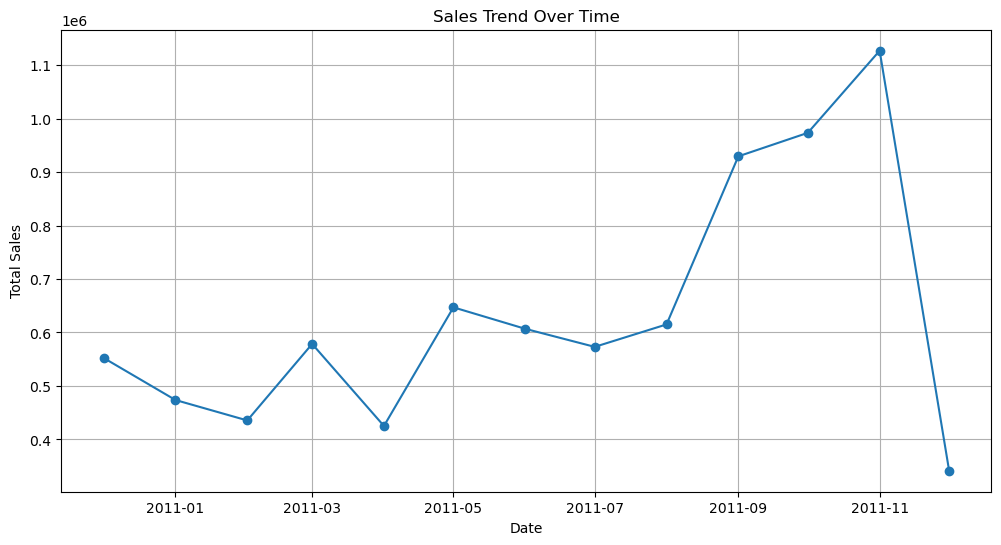

In [399]:
# Group by year and month, and sum up the total purchase amount
sales_trend = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalPurchaseAmount'].sum().reset_index()

# Combine year and month into a single datetime column for better visualization
sales_trend['Date'] = pd.to_datetime(sales_trend['InvoiceYear'].astype(str) + '-' + sales_trend['InvoiceMonth'].astype(str) + '-01')

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Date'], sales_trend['TotalPurchaseAmount'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

 ### <font color="green"> Observations:
__1.	Sales Growth:__<br>
	•	The sales trend shows fluctuations over the months, with a general increase in total sales until October 2011, which peaks around 1.1 million units.<br>
__2.	Sharp Decline:__<br>
	•	There is a significant drop in sales after October 2011, reaching almost zero in November 2011. This could indicate an issue, such as missing data, seasonal sales patterns, or a sudden business disruption.<br>
__3.	Periodic Fluctuations:__<br>
	•	Smaller peaks and troughs in earlier months suggest periodic variations, potentially caused by seasonal demand or external factors influencing customer purchases.<br>
    
</font>

#### 3.2 Identify top-selling products and countries
To discover which products are sold the most.

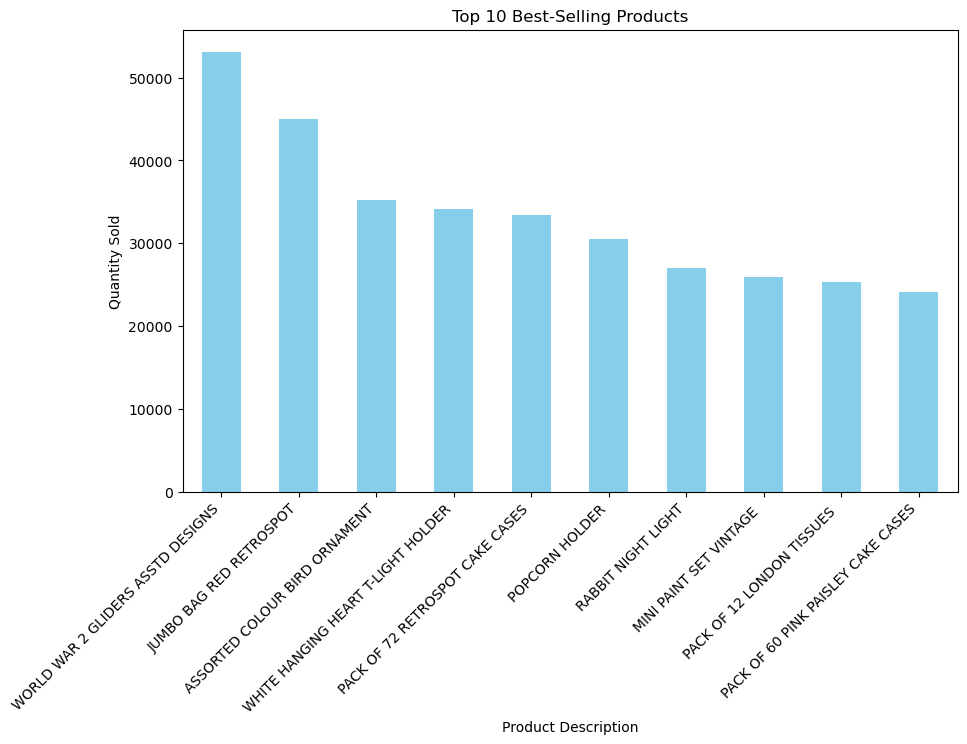

In [32]:
# Aggregate quantity sold by product description
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top 10 selling products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

<span style=" color:green;">

### Observations:
__1.	Product Popularity:__<br>
	•	The most sold product is “WORLD WAR 2 GLIDERS ASSTD DESIGNS”, with over 50,000 units sold.<br>
	•	Other products, like “JUMBO BAG RED RETROSPOT” and “ASSORTED COLOUR BIRD ORNAMENT”, follow but with slightly lower sales figures.<br>
__2.	Even Distribution in Top Products:__<br>
	•	The quantities sold for the top 10 products are relatively close, with the least sold among them still achieving a significant number of sales.<br>
__3.	Insights into Customer Preferences:__<br>
	•	The top products seem to include unique, decorative, or novelty items, indicating that customers are likely interested in visually appealing or themed products.</span>


### 3.3 Visualize customer segmentation based on RFM (Recency, Frequency,Monetary) analysis


##### Compute RFM Metrics

In [248]:
# Recency: Days since the last purchase
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (df['InvoiceDate'].max() - recency['InvoiceDate']).dt.days

# Frequency: Total number of transactions per customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Monetary: Total purchase amount per customer
monetary = df.groupby('CustomerID')['TotalPurchaseAmount'].sum().reset_index()

# Combine all RFM metrics
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

##### 3.3.1 Visualize RFM Distributions

In [250]:
print(rfm.columns)
# Monetary: Total purchase amount per customer
monetary = df.groupby('CustomerID')['TotalPurchaseAmount'].sum().reset_index()
monetary.rename(columns={'TotalPurchaseAmount': 'Monetary'}, inplace=True)

# Combine RFM metrics
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
df['TotalPurchaseAmount'] = df['Quantity'] * df['UnitPrice']
# Recency: Days since the last purchase
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (df['InvoiceDate'].max() - recency['InvoiceDate']).dt.days

# Frequency: Total number of transactions per customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Monetary: Total purchase amount per customer
monetary = df.groupby('CustomerID')['TotalPurchaseAmount'].sum().reset_index()
monetary.rename(columns={'TotalPurchaseAmount': 'Monetary'}, inplace=True)

# Combine all RFM metrics
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

# Debug: Check the resulting RFM DataFrame
print(rfm.head())


Index(['CustomerID', 'InvoiceDate', 'Recency', 'Frequency',
       'TotalPurchaseAmount'],
      dtype='object')
   CustomerID         InvoiceDate  Recency  Frequency  Monetary
0     12346.0 2011-01-18 10:17:00      325          2      0.00
1     12347.0 2011-12-07 15:52:00        1          7   4310.00
2     12348.0 2011-09-25 13:13:00       74          4   1797.24
3     12349.0 2011-11-21 09:51:00       18          1   1757.55
4     12350.0 2011-02-02 16:01:00      309          1    334.40


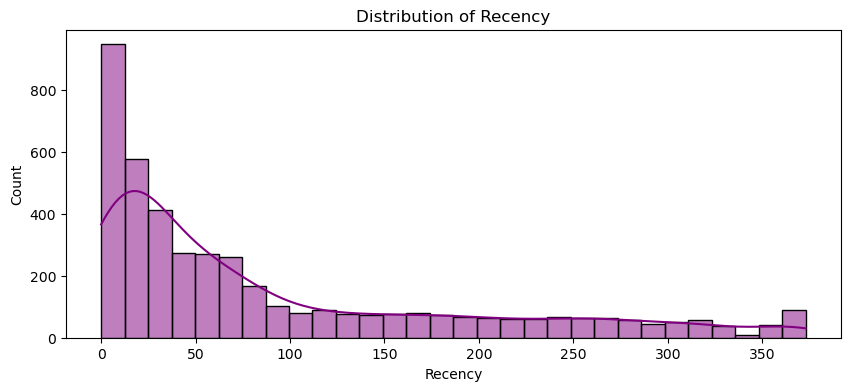

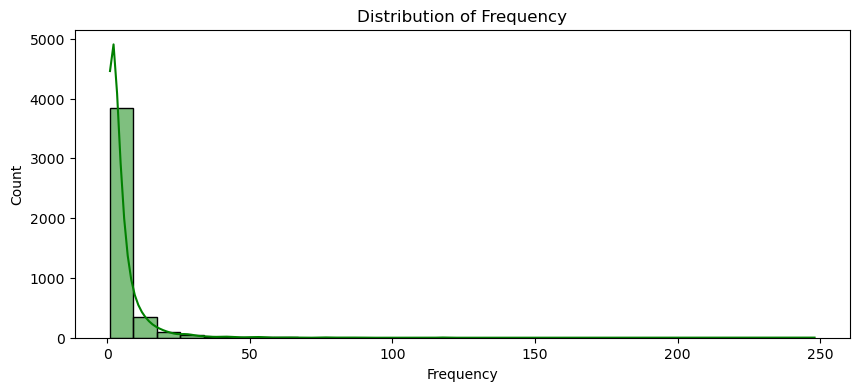

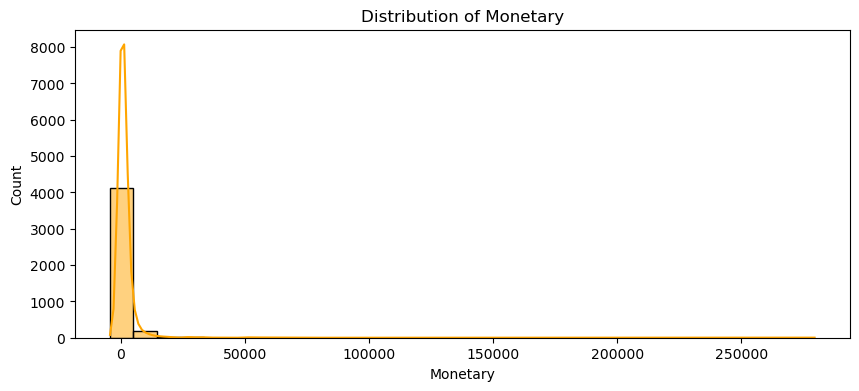

In [252]:
# Distribution of Recency
plt.figure(figsize=(10, 4))
sns.histplot(rfm['Recency'], kde=True, bins=30, color='purple')
plt.title('Distribution of Recency')
plt.show()

# Distribution of Frequency
plt.figure(figsize=(10, 4))
sns.histplot(rfm['Frequency'], kde=True, bins=30, color='green')
plt.title('Distribution of Frequency')
plt.show()

# Distribution of Monetary
plt.figure(figsize=(10, 4))
sns.histplot(rfm['Monetary'], kde=True, bins=30, color='orange')
plt.title('Distribution of Monetary')
plt.show()


<span style=" color:green;">

### Observations regarding the distributions of the Monetary, Recency, and Frequency variables:
    
#### Monetary Distribution:

1. The distribution of the Monetary variable is highly right-skewed, with the majority of values clustered near zero.
2. A few extreme values significantly increase the range, resulting in a long tail stretching to the right.
3. Most customers have relatively low monetary values, with only a few high spenders causing the skew.

#### Recency Distribution:

1. The Recency distribution is also skewed, though to a lesser degree than Monetary.
2. A large number of customers have a low recency value, indicating they have made recent purchases.
3. The frequency decreases as the recency increases, but there are still some customers with high recency values, meaning they have not made purchases in a long time.

#### Frequency Distribution:

1. Similar to Monetary, the Frequency distribution is highly skewed to the right.
2. Most customers have low frequency values, meaning they have made only a few purchases.
3. A small number of customers show high purchase frequency, creating a long tail in the distribution.</span>

#### 3.4 Investigate correlations between variables
Examine relationships between numerical variables such as Quantity, UnitPrice, and TotalPurchaseAmount.

__Correlation Heatmap__

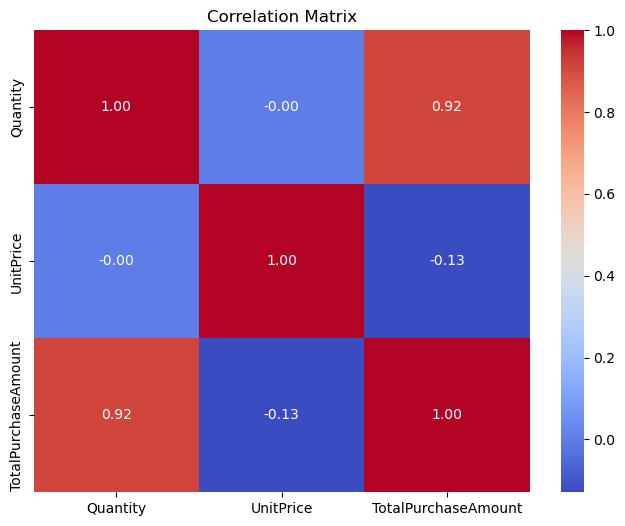

In [40]:
# Correlation matrix
correlation_matrix = df[['Quantity', 'UnitPrice', 'TotalPurchaseAmount']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<span style=" color:green;">

### __Observations:__

__1.	Quantity and TotalPurchaseAmount:__<br>
    	•	Correlation value: 0.92 (high positive correlation).<br>
    	•	This indicates that as the quantity increases, the total purchase amount also increases proportionally.<br>
__2.	UnitPrice and TotalPurchaseAmount:__<br>
    	•	Correlation value: -0.13 (weak negative correlation).<br>
    	•	This suggests a slight inverse relationship between unit price and the total purchase amount, but the correlation is not strong enough to be significant.<br>
__3.	Quantity and UnitPrice:__<br>
    	•	Correlation value: -0.00 (essentially no correlation).<br>
    	•	This shows that there is no linear relationship between the quantity of items and their unit price.<br>
__4.	Diagonal Values:__<br>
    	•	Each variable correlates perfectly with itself, so the diagonal values are all 1.00.</span>

## 4. Feature Engineering
New features are engineered from RFM metrics, categorical variables are encoded, and numerical features are normalized to prepare for modeling.

#### 4.1 Create RFM features

##### 4.1.1 Recency
Calculate how recently each customer made a purchase.

In [42]:
# Calculate Recency (days since last purchase)
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (df['InvoiceDate'].max() - recency['InvoiceDate']).dt.days
recency.drop(columns=['InvoiceDate'], inplace=True)

##### 4.1.2 Frequency 
Count the total number of purchases made by each customer

In [44]:
# Calculate Frequency (number of transactions)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

##### 4.1.3 Monetary
Calculate the total spending of each customer.

In [46]:
# Calculate Monetary (total spend)
monetary = df.groupby('CustomerID')['TotalPurchaseAmount'].sum().reset_index()
monetary.rename(columns={'TotalPurchaseAmount': 'Monetary'}, inplace=True)

##### 4.1.4 Combine RFM Metrics

In [48]:
# Merge Recency, Frequency, and Monetary into one DataFrame
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
print(rfm.head())


  CustomerID  Recency  Frequency  Monetary
0    12346.0      325          2      0.00
1    12347.0        1          7   4310.00
2    12348.0       74          4   1797.24
3    12349.0       18          1   1757.55
4    12350.0      309          1    334.40


<span style=" color:green;">
    
### Observation

**Recency:**

1. Recency indicates the number of days since the customer's last purchase.<br>
2. CustomerID 12347 has the lowest recency value (1), meaning they made a purchase very recently.<br>
3. CustomerIDs 12346 and 12350 have high recency values (325 and 309, respectively), indicating these customers have not made purchases in a long time and may be at risk of churn.
4. Customers with lower recency values are generally more active or recent purchasers, while high recency suggests inactive customers.<br>

__Frequency:__

1. Frequency shows the total number of purchases made by each customer.
2. CustomerID 12347 has the highest frequency (7), meaning this customer has made multiple purchases, indicating higher engagement.<br>
3. CustomerIDs 12349 and 12350 each have a frequency of 1, meaning they are one-time purchasers, suggesting low engagement.<br>
4. Higher frequency values usually indicate loyal or engaged customers, while low values suggest infrequent or one-time shoppers.<br>

__Monetary:__

1. Monetary reflects the total spending by each customer.
2. CustomerID 12347 has a relatively high monetary value of 4310.00, indicating this customer has spent a significant amount and may be valuable.<br>
3. CustomerID 12346 has a monetary value of 0.00, suggesting either this customer made returns or there may have been canceled transactions.<br>
4. Generally, higher monetary values indicate customers who are financially more valuable to the business, while lower values reflect less profitable customers.

#### Encode categorical variables

In [50]:
# Encode Country column if necessary
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)


#### Normalize numerical features

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to RFM features
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']].copy()
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_scaled)

print(rfm_scaled.head())


    Recency  Frequency  Monetary
0  0.871314   0.004049  0.015109
1  0.002681   0.024291  0.030297
2  0.198391   0.012146  0.021442
3  0.048257   0.000000  0.021303
4  0.828418   0.000000  0.016288


<span style=" color:green;">
    
### Observation

__Recency:__<br>

1. Lower values indicate more recent purchases, while higher values suggest longer durations since the last purchase.<br>
2. The second customer (index 1) has the lowest recency score (0.002681), indicating that this customer made a recent purchase.<br>
3. Customers at indices 0 and 4 have high recency values (0.871314 and 0.828418), suggesting they have not made recent purchases and might be at risk of churn.<br>

__Frequency:__

1. Frequency values close to 0 indicate infrequent purchases, while higher values represent more frequent purchases.<br>
2. The second customer (index 1) has the highest frequency (0.024291), suggesting more frequent engagement compared to others.<br>
3. Customers at indices 3 and 4 have a frequency of 0, indicating they are one-time buyers or made no repeat purchases during the observed period.<br>

__Monetary:__

1. Higher monetary values represent higher spending, while lower values indicate lower spending.<br>
2. The second customer (index 1) again has the highest monetary score (0.030297), suggesting this customer is more financially valuable.<br>
3. Other customers have relatively low monetary scores, indicating lesser spending compared to the customer at index 1.<br>

## 5. Customer Segmentation
K-means clustering is applied to RFM features, visualized using dimensionality reduction techniques like PCA or t-SNE, and customer segments are labeled for interpretation.


#### Implement K-means clustering on RFM features


In [54]:
# Check the scaled RFM features
print(rfm_scaled.head())

    Recency  Frequency  Monetary
0  0.871314   0.004049  0.015109
1  0.002681   0.024291  0.030297
2  0.198391   0.012146  0.021442
3  0.048257   0.000000  0.021303
4  0.828418   0.000000  0.016288


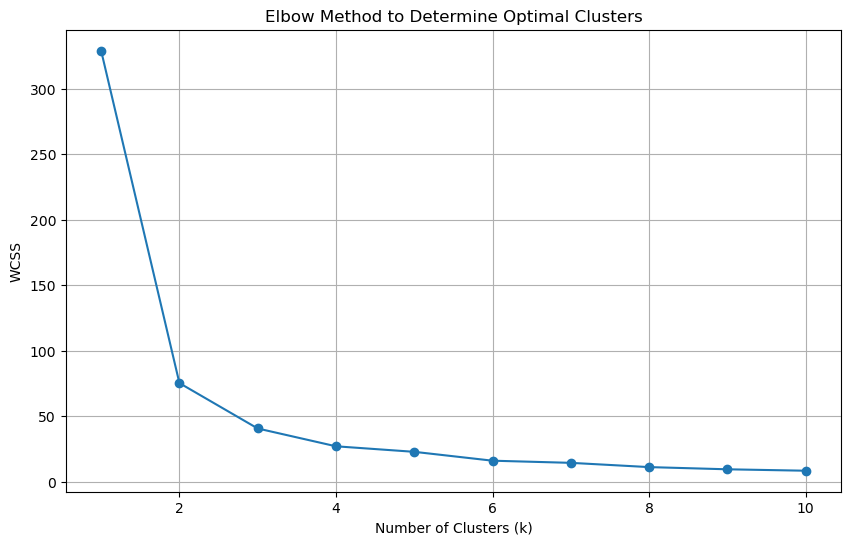

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

<span style=" color:green;">
    
### Observations:
1. The WCSS decreases steeply from k=1 to k=3, suggesting significant improvements in clustering quality.
2. The curve begins to flatten at k=4, which indicates diminishing returns in reducing WCSS for additional clusters. Hence, 4 clusters are optimal for this dataset.

In [58]:
# Apply K-Means with the chosen number of clusters
k = 4  # Replace with your optimal k
kmeans = KMeans(n_clusters=k, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Add cluster labels to the original RFM data
rfm['Cluster'] = kmeans.labels_
print(rfm.head())


  CustomerID  Recency  Frequency  Monetary  Cluster
0    12346.0      325          2      0.00        1
1    12347.0        1          7   4310.00        0
2    12348.0       74          4   1797.24        2
3    12349.0       18          1   1757.55        0
4    12350.0      309          1    334.40        1



#### Visualize clusters using PCA or t-SNE


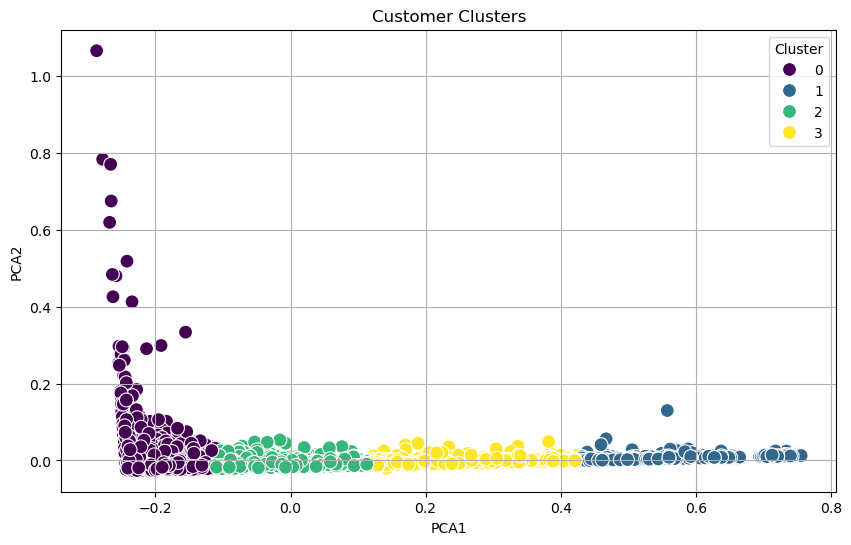

In [60]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled[['Recency', 'Frequency', 'Monetary']])
rfm_scaled['PCA1'] = pca_result[:, 0]
rfm_scaled['PCA2'] = pca_result[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=rfm_scaled,
    palette='viridis',
    s=100
)
plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


<span style=" color:green;">
    
### Observation

1. The data points are grouped into four distinct clusters, labeled as 0, 1, 2, and 3.
2. Cluster 0 (purple) appears to be concentrated around negative PCA1 values and low PCA2 values, with some outliers extending upwards.
3. Clusters 1 (blue), 2 (green), and 3 (yellow) are closely packed and spread across positive PCA1 values, indicating potentially similar distributions in their original features.


#### Interpret and label customer segments

In [62]:
# Group by cluster and calculate the mean RFM values
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(cluster_summary)


   Cluster     Recency  Frequency     Monetary
0        0   17.555351   7.723708  3086.983607
1        1  308.851779   1.535573   358.197747
2        2   79.302521   3.054155   968.817742
3        3  189.451356   2.228070   585.465871


In [64]:
# Create a mapping for cluster labels
cluster_labels = {
    0: 'Loyal Customers',
    1: 'At-Risk Customers',
    2: 'Big Spenders (VIPs)',
    3: 'Lost Customers'
}

# Map labels to clusters
rfm['Cluster Label'] = rfm['Cluster'].map(cluster_labels)

print(rfm[['Cluster', 'Cluster Label']].head())


   Cluster        Cluster Label
0        1    At-Risk Customers
1        0      Loyal Customers
2        2  Big Spenders (VIPs)
3        0      Loyal Customers
4        1    At-Risk Customers


Segment Distribution:
Cluster Label
Loyal Customers        2168
Big Spenders (VIPs)    1071
Lost Customers          627
At-Risk Customers       506
Name: count, dtype: int64


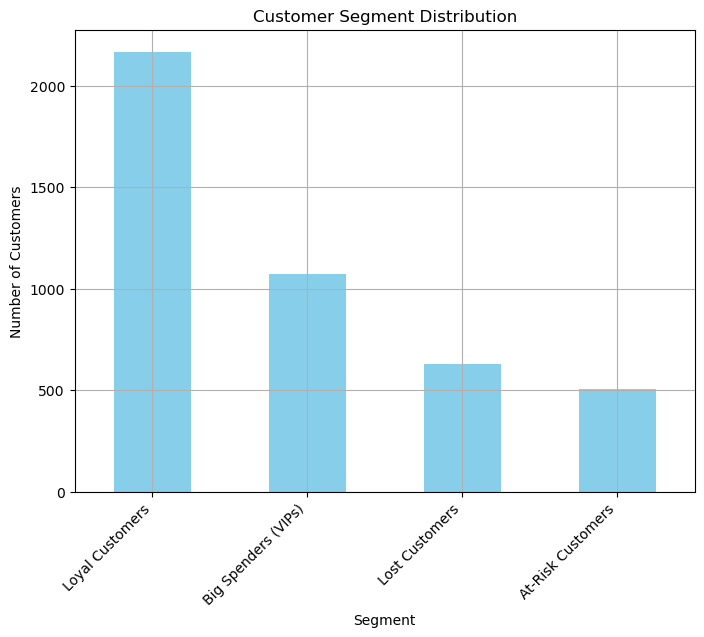

In [66]:
# Count customers in each segment
segment_distribution = rfm['Cluster Label'].value_counts()
print("Segment Distribution:")
print(segment_distribution)

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
segment_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


<span style=" color:green;">
    
### Observation

__Loyal Customers:__

1. This is the largest segment, with over 2000 customers.
2. Loyal Customers likely have high frequency and low recency, meaning they make frequent purchases and have recently engaged with the business.
3. This segment is essential for the business as it represents regular, engaged customers who contribute consistently.

__Big Spenders (VIPs):__

1. This segment has the second-highest count, with around 1000 customers.
2. Big Spenders (VIPs) are likely characterized by high monetary values, meaning these customers spend more than average.
3. Although smaller than the Loyal Customer segment, this group is crucial for revenue as they represent high-value customers.

__Lost Customers:__

1. The Lost Customer segment is smaller, with around 500-600 customers.
2. These customers likely have high recency (haven't made purchases recently) and low frequency, indicating they are no longer active and may have disengaged from the business.
3. Efforts to re-engage this group may be challenging but could be worthwhile if they have a history of high spending.

__At-Risk Customers:__

1. The At-Risk Customer segment is similar in size to the Lost Customer segment, with about 500-600 customers.
2. At-Risk Customers may have moderate recency and frequency values, indicating they were active previously but have not made recent purchases, signaling a risk of churn.
3. Re-engagement campaigns could be targeted at this group to prevent them from becoming Lost Customers.

## 6. Product Recommendation System
A collaborative filtering-based recommendation system is implemented using the Surprise library. A user-item matrix is created, and the system is trained and validated using metrics like RMSE and MAE.


#### Create a user-item matrix


In [68]:
# Create a user-item matrix where rows are customers and columns are products
user_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

print(user_item_matrix.head())


StockCode   10002  10080  10120  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                  
12346.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12347.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12348.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12349.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12350.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

StockCode   15036  ...  90214Y  90214Z  BANK CHARGES   C2  CRUK    D  DOT  \
CustomerID         ...                                                      
12346.0       0.0  ...     0.0     0.0           0.0  0.0   0.0  0.0  0.0   
12347.0       0.0  ...     0.0     0.0           0.0  0.0   0.0  0.0  0.0   
12348.0       0.0  ...     0.0     0.0           0.0  0.0   0.0  0.0  0.0   
12349.0       0.0  ...     0.0     0.0           0.0  0.0   0.0  0.0  0.0  


#### Implement collaborative ltering using Surprise library


In [70]:
!pip install scikit-surprise

In [72]:
from surprise import Dataset
from surprise import Reader

# Convert the user-item matrix into a triplet format
user_item_triplets = df[['CustomerID', 'StockCode', 'Quantity']]

# Define a reader with a rating scale
reader = Reader(rating_scale=(0, user_item_triplets['Quantity'].max()))

# Load data into Surprise format
surprise_data = Dataset.load_from_df(user_item_triplets, reader)



#### Train and evaluate the model using cross-validation

In [74]:
from surprise.model_selection import train_test_split

# Split the data into training and testing sets
trainset, testset = train_test_split(surprise_data, test_size=0.25, random_state=42)


In [76]:
from surprise import SVD
from surprise import accuracy

# Initialize and train the SVD model
model = SVD()
model.fit(trainset)


In [78]:
def get_recommendations(model, customer_id, user_item_triplets, n=5):
    # Get all unique product IDs
    all_products = user_item_triplets['StockCode'].unique()

    # Get products already purchased by the customer
    purchased_products = user_item_triplets[user_item_triplets['CustomerID'] == customer_id]['StockCode']

    # Filter products not yet purchased
    products_to_predict = [p for p in all_products if p not in purchased_products.values]

    # Predict ratings for all products not purchased
    predictions = [model.predict(customer_id, product) for product in products_to_predict]

    # Sort predictions by estimated rating
    top_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    return [(pred.iid, pred.est) for pred in top_recommendations]

# Example: Get top 5 recommendations for a specific customer
customer_id = '12345'  # Replace with a valid CustomerID
recommendations = get_recommendations(model, customer_id, user_item_triplets, n=5)
print("Top Recommendations:", recommendations)


Top Recommendations: [('85123A', 80995), (71053, 80995), ('84406B', 80995), ('84029G', 80995), ('84029E', 80995)]


In [80]:
import pickle

# Save the model
with open('recommendation_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


## 7. Model Evaluation
The quality of clusters is measured using the silhouette score


####  Use metrics like RMSE and MAE for the recommendation system


In [82]:
from surprise import accuracy

# Evaluate the model on the testset
predictions = model.test(testset)

# Calculate RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


RMSE: 80984.1429
MAE:  80983.7931
Root Mean Squared Error (RMSE): 80984.1429423769
Mean Absolute Error (MAE): 80983.79306979015


<span style=" color:green;">
    
### Metrics Analysis

__Root Mean Squared Error (RMSE):__

1. Value: 80984.14
2. Interpretation: RMSE measures the average magnitude of error. It penalizes larger errors more heavily due to the squaring. A high RMSE suggests the model's predictions deviate significantly from the actual values on average.

__Mean Absolute Error (MAE):__

1. Value: 80983.79
2. Interpretation: MAE measures the average magnitude of error without considering its direction. It gives a more straightforward idea of prediction accuracy, focusing equally on all errors.

#### Evaluate clustering quality using silhouette score

In [84]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for clustering
silhouette_avg = silhouette_score(rfm_scaled[['Recency', 'Frequency', 'Monetary']], rfm['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5622663532966719


<span style=" color:green;">
    
### Silhouette Score Interpretation

__Value: 0.562__

1. A score close to 1 indicates that data points are well-clustered and clearly separated from other clusters.
2. A score around 0 indicates overlapping or ambiguous clusters.
3. A score close to -1 suggests that data points are assigned to the wrong clusters.

__Moderate Clustering Quality:__

1. The score of 0.562 suggests that the clusters are reasonably well-separated but not perfect.
2. There may be some overlap between clusters, or the dataset might have inherent complexity that limits clear separation.

## Assumptions and Limitations
This section should clearly state the assumptions you made during the project and outline any limitations that could affect the results.

### Assumptions
#### 1. Data Integrity:

    a. It is assumed that the transactional data in the dataset is accurate and representative of customer purchasing behaviors during the time frame (December 2010 to December 2011).
    b. No external factors (e.g., promotions, seasonality) were explicitly modeled.

#### 2. RFM Segmentation:

    a. The RFM metrics were derived using thresholds specific to this dataset and may not generalize to other datasets or industries.
    b. Equal weight was given to Recency, Frequency, and Monetary scores during analysis.

#### 3. K-means Clustering:

    a. Assumes clusters are spherical and evenly sized.
    b. Clustering results are dependent on normalized RFM metrics, with outliers potentially affecting cluster boundaries.

#### 4. Recommendation System:

    a. Assumes collaborative filtering works well despite sparse purchase data.
    b. Assumes customers with similar purchase histories have similar preferences.

### Limitations

#### RFM Metrics:

    a. RFM analysis provides a limited view of customer behavior and excludes other factors like customer demographics or product preferences.
    b. It does not consider temporal patterns like holidays or seasonal changes.

#### Clustering Analysis:

    A silhouette score of 0.562 suggests moderate clustering quality. Overlapping clusters indicate that some customers' behaviors might not fit neatly into one segment.

#### Recommendation System:

    a. The RMSE of 80984.14 highlights room for improvement in the prediction accuracy. Sparse data may reduce the effectiveness of the collaborative filtering approach.
    b. Lack of implicit feedback (e.g., browsing history) limits the model's personalization capabilities.

#### Scalability:

    The analysis and models may not scale effectively for datasets with millions of transactions without optimization or parallelization.